In [1]:
# Install Packages
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install keras
!pip install tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 1.1 MB/s eta 0:00:00a 0:00:010m

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 790.9 kB/s eta 0:00:0000:0100:01
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [pandas]2m2/3 [pandas]

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 1.4 MB/s eta 0:00:0000:0100:010m
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 1.4 MB/s eta 0:00:00a 0:0

Skipping file with ValueError: 39_1_20170116174525125.jpg.chip.jpg
Skipping file with ValueError: 61_1_20170109150557335.jpg.chip.jpg
Skipping file with ValueError: 61_1_20170109142408075.jpg.chip.jpg


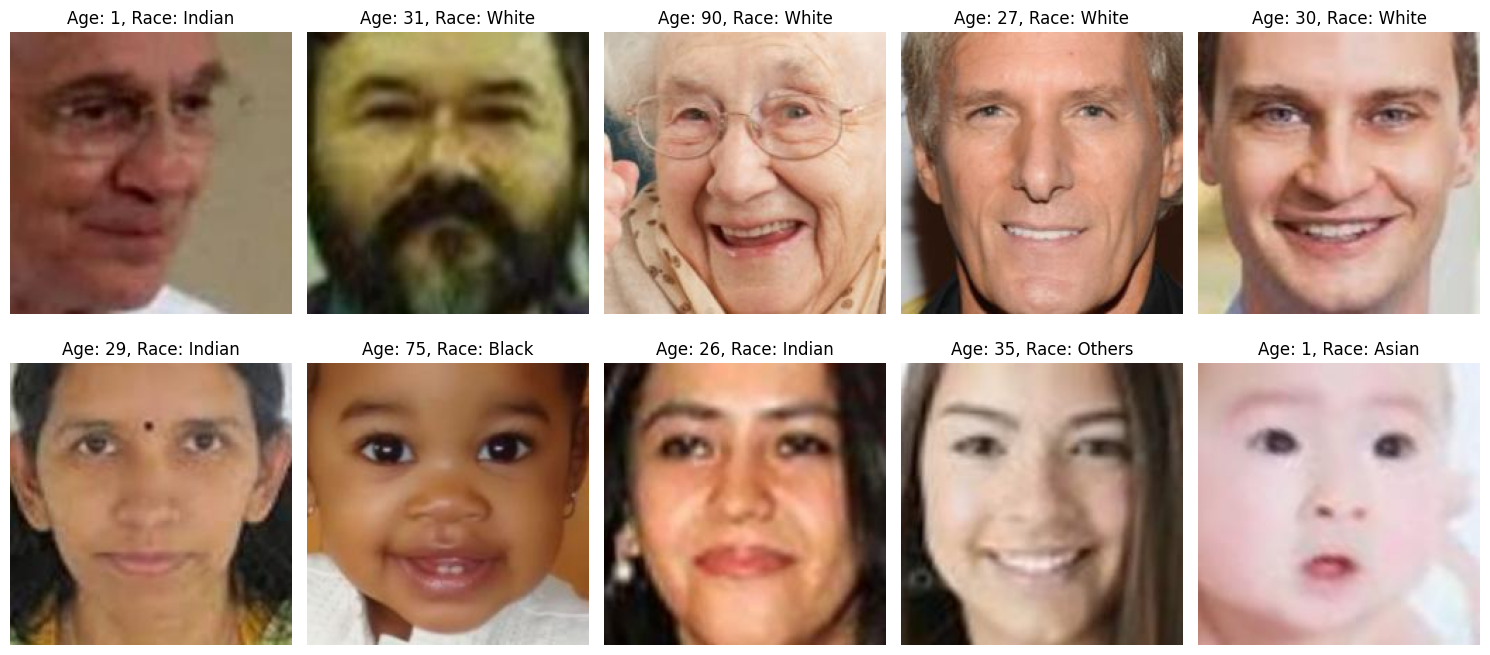

In [ ]:
# Importing and visualizing the dataset
import os
import matplotlib.pyplot as plt
from PIL import Image
import random

dataset_path = "UTKFace"

# image_paths, age, gender, race
image_paths = []
age_list = []
gender_list = []
race_list = []

race_dict = {
    0: 'White',
    1: 'Black',
    2: 'Asian',
    3: 'Indian',
    4: 'Others'
}

gender_dict = {
    0: 'Male',
    1: 'Female',
}

for images in os.listdir(dataset_path):
    if images.endswith(".jpg"):
        try:
            image_name = os.path.basename(images)
            image_path = os.path.join(dataset_path, image_name)
            image_labels = image_name.split('_')

            age_list.append(int(image_labels[0]))
            gender_list.append(int(image_labels[1]))
            race_list.append(int(image_labels[2]))
            image_paths.append(image_path)

        except ValueError:
            print(f"Skipping file with ValueError: {image_name}")
        except IndexError:
            print(f"Skipping file with IndexError: {image_name}")
        except Exception as e:
            print(f"Skipping file with unknown error '{e}': {image_name}")   

## Displaying random images with ethnicity and age
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 7))
for i in range(10):
    idx = random.randint(0, len(image_paths) - 1)
    
    img_path = image_paths[idx]
    age = age_list[idx]
    race = race_list[idx]
    
    ax = axes[i // 5, i % 5]
    img = Image.open(img_path)
    ax.imshow(img)
    ax.set_title(f"Age: {age}, Race: {race_dict.get(race, 'Unknown')}")
    ax.axis('off')

plt.tight_layout()
plt.show()


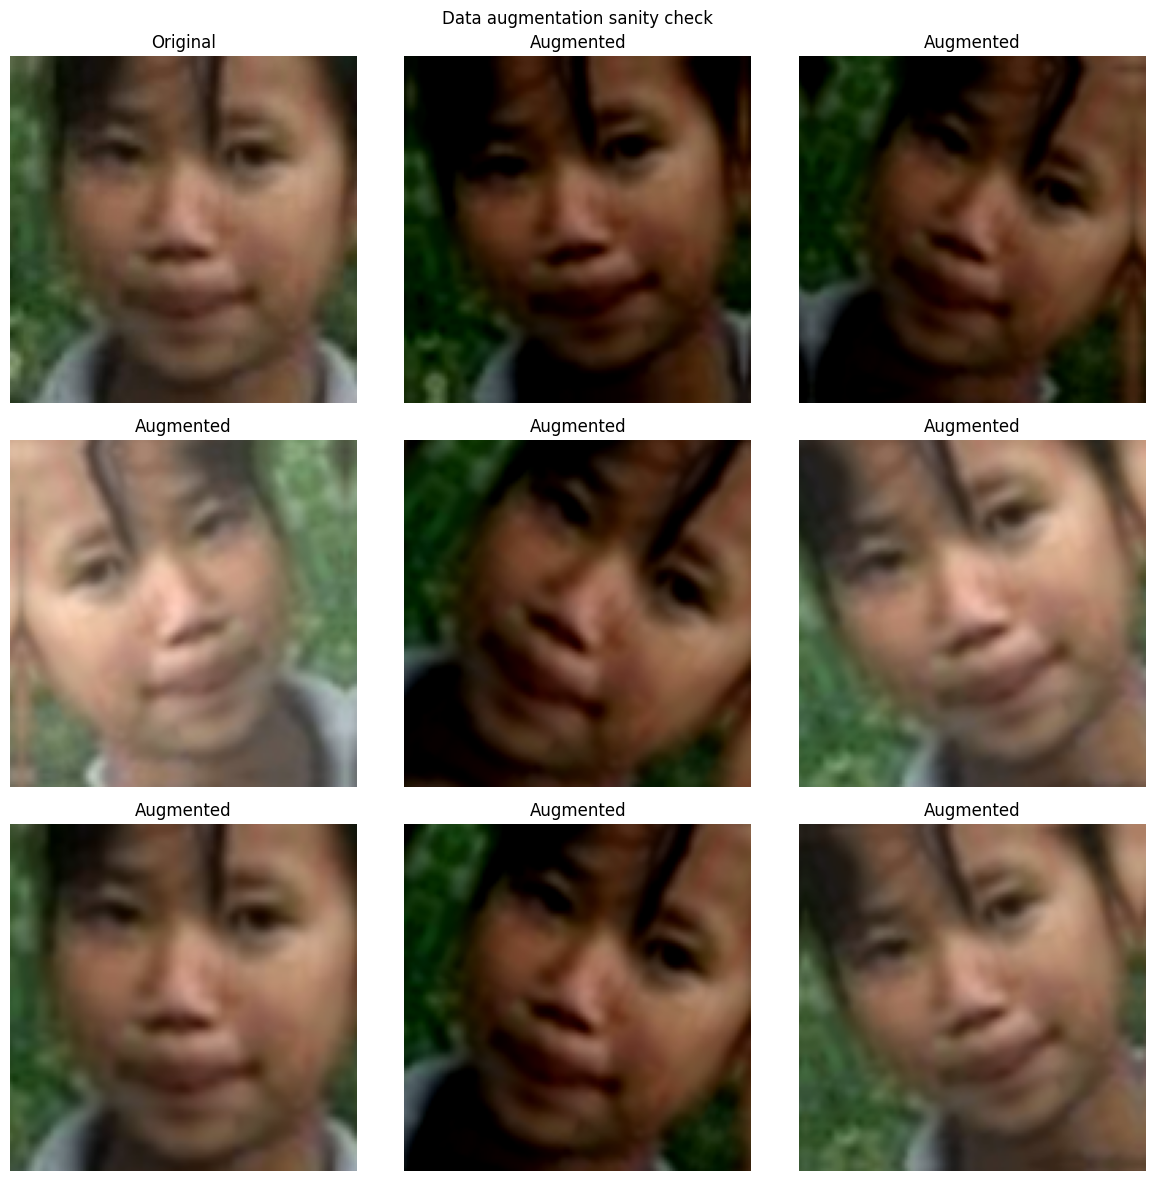

In [9]:
# Data Augmentation
import keras
from keras import layers, models
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf

IMG_SIZE = 128
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
        layers.RandomBrightness(factor=0.2),
        layers.RandomContrast(factor=0.2),
    ],
    name="data_augmentation"
)

img = tf.io.read_file(image_paths[0])
img = tf.image.decode_jpeg(img, channels=3)
img = tf.image.resize(img, [IMG_SIZE, IMG_SIZE])
img_batch = tf.expand_dims(img, 0)

plt.figure(figsize=(12, 12))
ax = plt.subplot(3, 3, 1)
plt.imshow(img.numpy().astype("uint8")) 
plt.title("Original")
plt.axis("off")

for i in range(8):
    ax = plt.subplot(3, 3, i + 2) 
    augmented_batch = data_augmentation(img_batch, training=True)
    augmented_img = augmented_batch[0]
    
    plt.imshow(augmented_img.numpy().astype("uint8"))
    plt.title("Augmented")
    plt.axis("off")

plt.suptitle("Data augmentation sanity check", fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# Model 1: AlexNet Inspired model
